# What sells a car?

Hundreds of free advertisements for vehicles are published on Crankshaft List site every day. We need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading the data

In [2]:
# Loading the data file into a DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

### Exploring the initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
# printing the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# printing a sample of data
df.head()
#df.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


From the printed data sample we see that in some columns there are missing values that we'll need to look into.

We also have columns (model_year, cylinders, odometer, is_4wd, date_posted) that have inappropriate data types for our analysis.

There are missing values in several columns - model_year, cylinders, odometer, paint_color and is_4wd. Most missing values are in is_4wd column.

In [5]:
# looking for missing values
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conclusions and further steps
Further we'll work on treating missing values.

Missing values in model_year, cylinders and odometer will be replaced according to model and model year.

Missing values in paint_color will be replaced with 'unknown' as there is rather no way to determine color of vehicle (e.g., all of them, with no color indicated, might have custom paint work).

Missing values in is_4wd appear to be boolean, where NaN would mean the vehicle is not a four wheel drive. These NaNs will need to be replaced with 0s to make analysis easier.

## Treating missing values

In [6]:
# looking at missing values in model_year
df[df.model_year.isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


In [7]:
# adding a new column
df['model_year_filled']=df['model_year']

In [8]:
# grouping the data by model and calculating mean model year for each model
grouped_data=df.groupby(['model'])['model_year'].mean().apply(np.floor)
grouped_data.head()

model
acura tl             2007.0
bmw x5               2008.0
buick enclave        2012.0
cadillac escalade    2008.0
chevrolet camaro     2008.0
Name: model_year, dtype: float64

In [9]:
# passing it to the dictionary
grouped_data_dict=pd.Series(grouped_data).to_dict()
grouped_data_dict

{'acura tl': 2007.0,
 'bmw x5': 2008.0,
 'buick enclave': 2012.0,
 'cadillac escalade': 2008.0,
 'chevrolet camaro': 2008.0,
 'chevrolet camaro lt coupe 2d': 2015.0,
 'chevrolet colorado': 2012.0,
 'chevrolet corvette': 1996.0,
 'chevrolet cruze': 2014.0,
 'chevrolet equinox': 2013.0,
 'chevrolet impala': 2008.0,
 'chevrolet malibu': 2010.0,
 'chevrolet silverado': 2007.0,
 'chevrolet silverado 1500': 2010.0,
 'chevrolet silverado 1500 crew': 2015.0,
 'chevrolet silverado 2500hd': 2009.0,
 'chevrolet silverado 3500hd': 2011.0,
 'chevrolet suburban': 2007.0,
 'chevrolet tahoe': 2008.0,
 'chevrolet trailblazer': 2004.0,
 'chevrolet traverse': 2012.0,
 'chrysler 200': 2013.0,
 'chrysler 300': 2010.0,
 'chrysler town & country': 2010.0,
 'dodge charger': 2012.0,
 'dodge dakota': 2003.0,
 'dodge grand caravan': 2011.0,
 'ford econoline': 2010.0,
 'ford edge': 2012.0,
 'ford escape': 2011.0,
 'ford expedition': 2007.0,
 'ford explorer': 2009.0,
 'ford f-150': 2009.0,
 'ford f-250': 2004.0,
 

In [10]:
# replacing missing values in model_year_filled column with the created dictionary
df['model_year_filled']=df['model_year_filled'].fillna(df.model.map(grouped_data_dict))

In [11]:
# checking one of the examples
df.loc[20]

price                           6990
model_year                       NaN
model                chevrolet tahoe
condition                  excellent
cylinders                        8.0
fuel                             gas
odometer                    147485.0
transmission               automatic
type                             SUV
paint_color                   silver
is_4wd                           1.0
date_posted               2018-08-05
days_listed                       28
model_year_filled             2008.0
Name: 20, dtype: object

In [12]:
# making sure values got replaced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         47906 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  object 
 4   cylinders          46265 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           43633 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   paint_color        42258 non-null  object 
 10  is_4wd             25572 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  model_year_filled  51525 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.5+ MB


In [13]:
# grouping the data by model and model_year_filled
#filling missing values in cylinders with most common values for those models and model years
df['cylinders'] = df.groupby(['model', 'model_year_filled'])['cylinders'].transform(lambda grp: grp.fillna(grp.mode().max()))
df['cylinders'] = df.groupby(['model'])['cylinders'].transform(lambda grp: grp.fillna(grp.mode().max()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              51525 non-null  int64  
 1   model_year         47906 non-null  float64
 2   model              51525 non-null  object 
 3   condition          51525 non-null  object 
 4   cylinders          51525 non-null  float64
 5   fuel               51525 non-null  object 
 6   odometer           43633 non-null  float64
 7   transmission       51525 non-null  object 
 8   type               51525 non-null  object 
 9   paint_color        42258 non-null  object 
 10  is_4wd             25572 non-null  float64
 11  date_posted        51525 non-null  object 
 12  days_listed        51525 non-null  int64  
 13  model_year_filled  51525 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.5+ MB


In [14]:
grouped=df.groupby(['model'])['model_year_filled'].median()
grouped.head()

model
acura tl             2007.0
bmw x5               2009.0
buick enclave        2012.0
cadillac escalade    2008.0
chevrolet camaro     2012.0
Name: model_year_filled, dtype: float64

In [15]:
# grouping the data by model and model_year_filled
# filling missing values in odometer with median values for those models and model years

df['odometer'] = df.groupby(['model', 'model_year_filled'])['odometer'].transform(lambda grp: grp.fillna(grp.median()))

# grouping by model_year_filled and filling remaining missing values with medians
df['odometer'] = df.groupby(['model_year_filled'])['odometer'].transform(lambda grp: grp.fillna(grp.median()))

# filling last value that's missing in odometer according to model and model year
df.query('model_year_filled <= 1940 and model == "ford f-150"')
df['odometer'].fillna(30000, inplace=True)
df.query('model_year_filled <= 1940 and model == "ford f-150"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled
34713,5000,1936.0,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,NaN,2018-11-22,10,1936.0
45694,18000,1929.0,ford f-150,good,8.0,gas,30000.0,manual,other,silver,NaN,2018-11-18,59,1929.0


In [16]:
# replacing missing values in paint_color to 'unknown'
df['paint_color'] = df['paint_color'].replace(np.nan, 'unknown')
df[df['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled


In [17]:
# checking unique values in is_4wd column
df['is_4wd'].unique()

array([ 1., nan])

In [18]:
# replacing missing values with 0
df['is_4wd'].fillna(0, inplace = True)

## Fixing data types

In [19]:
# fixing data types
df['model_year_filled'] = df['model_year_filled'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)
df['is_4wd'] = df['is_4wd'].astype(int)
df['odometer'] = np.floor(pd.to_numeric(df['odometer'], errors='coerce')).astype('int64')
df.dtypes

price                  int64
model_year           float64
model                 object
condition             object
cylinders              int64
fuel                  object
odometer               int64
transmission          object
type                  object
paint_color           object
is_4wd                 int64
date_posted           object
days_listed            int64
model_year_filled      int64
dtype: object

## Enriching the data

In [20]:
# adding datetime values for when the ad was placed
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df['date_posted'].dtype.type

numpy.datetime64

In [21]:
# adding the vehicle's age when the ad was placed
df['weekday'] = df['date_posted'].dt.weekday
df['month_posted'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year
df['age_when_posted'] = df['year_posted'] - df['model_year_filled']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,weekday,month_posted,year_posted,age_when_posted
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2011,5,6,2018,7
1,25500,NaN,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2009,4,10,2018,9
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2013,3,2,2019,6
3,1500,2003.0,ford f-150,fair,8,gas,177500,automatic,pickup,unknown,0,2019-03-22,9,2003,4,3,2019,16
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2017,1,4,2019,2


In [22]:
# replacing 0s in age_when_posted with 1s to be able to calculate vehicle's average mileage per year
df['age_when_posted'] = df['age_when_posted'].replace(0, 1)

In [23]:
# adding the vehicle's average mileage per year
df['average_miles_year'] = df['odometer'] / df['age_when_posted']
df[df['average_miles_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,weekday,month_posted,year_posted,age_when_posted,average_miles_year


In [24]:
# In the condition column, replacing string values with a numeric scale:
# new = 5
# like new = 4
# excellent = 3
# good = 2
# fair = 1
# salvage = 0

def condition_group(row):
    condition = row['condition']
    
    if condition == 'new':
        return 5

    if condition == 'like new':
        return 4

    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1

    return 0


In [25]:
# checking whether the function is working
row_values = ['new']
row_columns = ['condition']
row = pd.Series(data=row_values, index=row_columns) 
condition_group(row)

5

In [26]:
# creating new column based on function
df['condition_group'] = df.apply(condition_group, axis=1)

In [27]:
# looking at data sample
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,weekday,month_posted,year_posted,age_when_posted,average_miles_year,condition_group
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2011,5,6,2018,7,20714.285714,2
1,25500,NaN,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2009,4,10,2018,9,9856.111111,2
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2013,3,2,2019,6,18333.333333,4
3,1500,2003.0,ford f-150,fair,8,gas,177500,automatic,pickup,unknown,0,2019-03-22,9,2003,4,3,2019,16,11093.750000,1
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2017,1,4,2019,2,40451.500000,3


## Checking the clean data

In [28]:
# printing the general/summary info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          47906 non-null  float64       
 2   model               51525 non-null  object        
 3   condition           51525 non-null  object        
 4   cylinders           51525 non-null  int64         
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  int64         
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  int64         
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  model_year_filled   51525 non-null  int64     

In [29]:
# printing a sample of data
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,weekday,month_posted,year_posted,age_when_posted,average_miles_year,condition_group
51520,9249,2013.0,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2013,2,10,2018,5,17627.200000,4
51521,2700,2002.0,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2002,2,11,2018,16,11343.750000,0
51522,3950,2009.0,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,2009,3,11,2018,9,14222.222222,3
51523,7455,2013.0,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,2013,0,7,2018,5,27914.600000,2
51524,6300,2014.0,nissan altima,good,4,gas,99253,automatic,sedan,unknown,0,2018-06-05,10,2014,1,6,2018,4,24813.250000,2


## Studying the core parameters
The parameters are:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

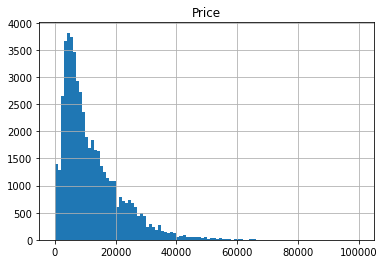

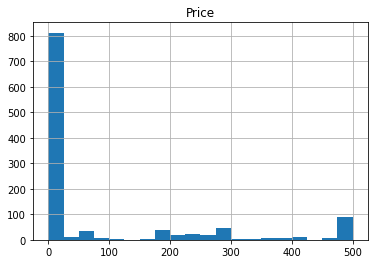

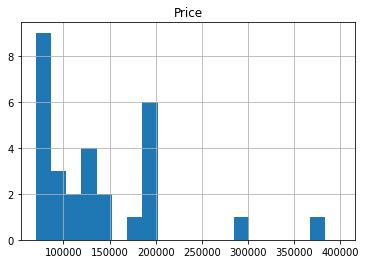

In [30]:
# looking at distribution of values in price column
df.hist('price', bins = 100, range=(0, 100000))
plt.title('Price')
# lowest prices
df.hist('price', bins = 20, range=(0, 500))
plt.title('Price')
# looking at distribution of highest prices
df.hist('price', bins = 20, range=(70000, 400000))
plt.title('Price')
df['price'].describe()

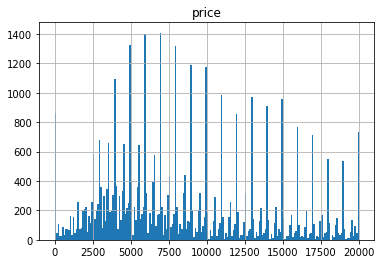

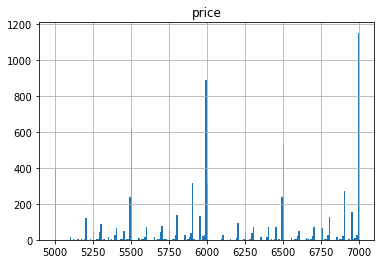

In [31]:
# looking closer at prices between 0 to 20000
df.hist('price', bins = 200, range=(0, 20000))
# looking at prices between 5000 to 7000
df.hist('price', bins = 200, range=(5000, 7000));

From the plotted histograms, we can see that there are around 850 cars that cost less than 100.
In histogram where price range is 0 to 20000, we have some spikes in concentrations and it is apparent that sellers will often choose to price their cars in round numbers of thousands.

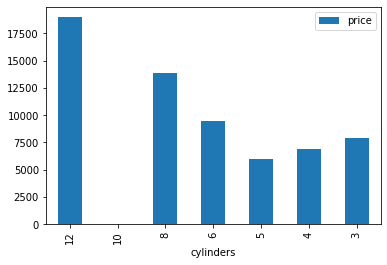

In [32]:
# plotting a bar chart that shows median vehicle price depending on amount of cylinders
cyl_stats = df.pivot_table(index = 'cylinders', values = 'price', aggfunc = 'median')
cyl_stats.sort_values(by = 'cylinders', ascending = False).plot(kind = 'bar')
cyl_stats;

It appears some of 10 cylinder vehicles are priced only at 1 (USD?).

In [33]:
# looking closer at 10 cylinder cars
df.query('cylinders == 10 and price == 1').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,weekday,month_posted,year_posted,age_when_posted,average_miles_year,condition_group
9168,1,2017.0,ford expedition,excellent,10,gas,56048,other,SUV,grey,1,2019-04-01,45,2017,0,4,2019,2,28024.00,3
9169,1,2014.0,jeep wrangler,excellent,10,gas,84902,other,SUV,unknown,1,2018-09-13,32,2014,3,9,2018,4,21225.50,3
9173,1,2019.0,gmc acadia,excellent,10,gas,11000,other,SUV,custom,1,2019-02-04,154,2019,0,2,2019,1,11000.00,3
9174,1,2017.0,jeep grand cherokee,excellent,10,gas,42469,other,SUV,white,1,2018-07-23,9,2017,0,7,2018,1,42469.00,3
9177,1,2014.0,chevrolet camaro,excellent,10,gas,62801,other,coupe,black,1,2018-11-11,45,2014,6,11,2018,4,15700.25,3


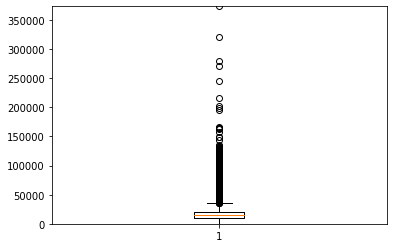

count     51525.000000
mean      17640.774167
std       12640.468137
min           0.000000
25%       10777.777778
50%       14996.777778
75%       21077.777778
max      373200.000000
Name: average_miles_year, dtype: float64

In [34]:
# looking at distribution of values in average_miles_year column
plt.boxplot(df['average_miles_year'].astype(int))
plt.ylim([0, df['average_miles_year'].max()])
plt.show()
df['average_miles_year'].describe()

count     51525.000000
mean      17640.774167
std       12640.468137
min           0.000000
25%       10777.777778
50%       14996.777778
75%       21077.777778
max      373200.000000
Name: average_miles_year, dtype: float64

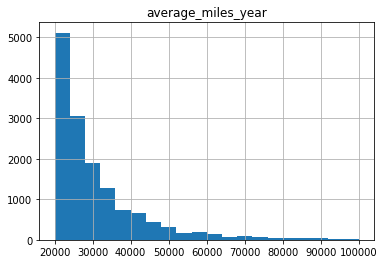

In [35]:
# looking at distribution of highest values
df.hist('average_miles_year', bins = 20, range=(20000, 100000))
df['average_miles_year'].describe()

,average_miles_year
condition,
excellent,15473.833333
fair,12000.000000
good,14585.285714
like new,15313.833333
new,8571.428571
salvage,12250.000000


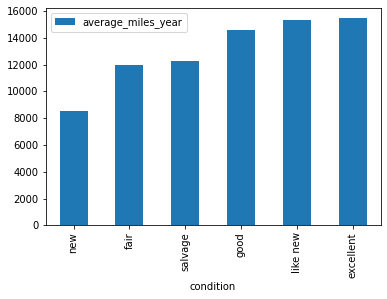

In [36]:
# plotting a bar chart that shows median yearly mileage depending on vehicle's condition
mileage = df.pivot_table(index = 'condition', values = 'average_miles_year', aggfunc = 'median')
mileage.sort_values(by = 'average_miles_year').plot(kind = 'bar')
mileage

New car median yearly mileage value is 8571 while cars in excellent category have highest median yearly mileage value - 15473.

,price
age_when_posted,
1,22490.0
2,18990.0
3,18000.0
4,14900.0
5,12500.0


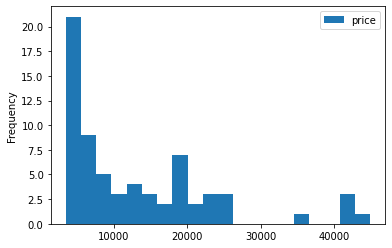

In [37]:
# looking at median prices depending on vehicle's age
age_median_price = df.pivot_table(index = 'age_when_posted', values = 'price', aggfunc = 'median')
age_median_price.sort_values(by='age_when_posted').plot(kind='hist', bins = 20)
age_median_price.head()

,average_miles_year
age_when_posted,
1,27828.000000
2,25638.000000
3,23933.666667
4,21540.500000
5,19750.000000


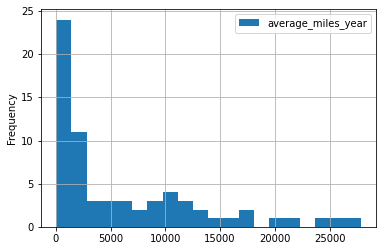

In [38]:
# looking at median yearly mileage values depending on vehicle's age
miles_age = df.pivot_table(index = 'age_when_posted', values = 'average_miles_year', aggfunc = 'median')
miles_age.sort_values(by='age_when_posted').plot(kind='hist', bins = 20, grid = True)
miles_age.head()

## Studying and treating the outliers

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

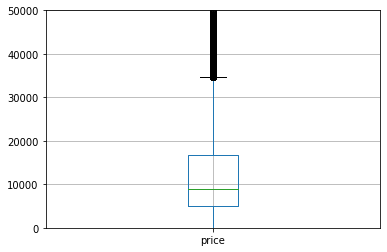

In [39]:
# Determine the lower limits for outliers
plt.ylim(0, 50000)
df.boxplot(column=['price'])
df['price'].describe()

count     51525.000000
mean      17640.774167
std       12640.468137
min           0.000000
25%       10777.777778
50%       14996.777778
75%       21077.777778
max      373200.000000
Name: average_miles_year, dtype: float64

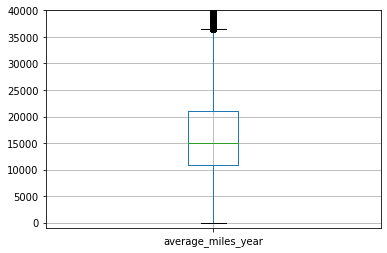

In [40]:
Q1 = df['average_miles_year'].quantile(0.25)
Q3 = df['average_miles_year'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(-1000, 40000)
df.boxplot(column=['average_miles_year'])
plt.hlines(y=[Q1-1.5*IQR], xmin=0.9, xmax=1.1, color='red')
df['average_miles_year'].describe()

count     51525.000000
mean      17640.774167
std       12640.468137
min           0.000000
25%       10777.777778
50%       14996.777778
75%       21077.777778
max      373200.000000
Name: average_miles_year, dtype: float64

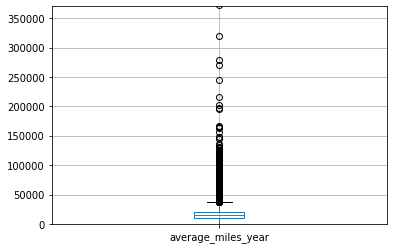

In [41]:
Q1 = df['average_miles_year'].quantile(0.25)
Q3 = df['average_miles_year'].quantile(0.75)
IQR = Q3 - Q1
plt.ylim(0, 370000)
df.boxplot(column=['average_miles_year'])
plt.hlines(y=[Q1-1.5*IQR], xmin=0.9, xmax=1.1, color='red')
df['average_miles_year'].describe()

In [42]:
# checking the upper limits for outliers
df.sort_values('average_miles_year', ascending=False).head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,weekday,month_posted,year_posted,age_when_posted,average_miles_year,condition_group
4970,29000,2018.0,chevrolet silverado 1500,excellent,8,gas,373200,automatic,truck,unknown,1,2018-09-14,40,2018,4,9,2018,1,373200.000000,3
9742,12500,2018.0,nissan altima,like new,4,gas,320000,automatic,sedan,silver,0,2018-08-14,75,2018,1,8,2018,1,320000.000000,4
13027,8500,2015.0,chevrolet malibu,excellent,4,gas,838095,automatic,sedan,silver,0,2018-05-30,10,2015,2,5,2018,3,279365.000000,3
5735,7500,2015.0,hyundai elantra,excellent,4,gas,813542,other,coupe,brown,0,2018-11-21,5,2015,2,11,2018,3,271180.666667,3
48962,40000,2014.0,ram 3500,excellent,8,diesel,980000,automatic,truck,white,1,2018-12-06,7,2014,3,12,2018,4,245000.000000,3
2840,18500,2014.0,ford explorer,excellent,6,gas,866000,automatic,SUV,black,1,2018-07-20,14,2014,4,7,2018,4,216500.000000,3
33578,12995,2014.0,chrysler 300,like new,6,gas,811956,automatic,sedan,unknown,0,2018-11-13,44,2014,1,11,2018,4,202989.000000,4
40729,4700,2013.0,chevrolet cruze,good,6,gas,990000,automatic,sedan,black,0,2018-05-02,4,2013,2,5,2018,5,198000.000000,2
36412,9000,2018.0,chevrolet equinox,excellent,4,gas,195700,automatic,SUV,unknown,1,2018-05-16,31,2018,2,5,2018,1,195700.000000,3
41699,10300,2013.0,ford escape,excellent,6,gas,831000,automatic,SUV,brown,0,2018-05-27,30,2013,6,5,2018,5,166200.000000,3


In [43]:
# checking amount of rows where average miles per year is from 30 000 and up
sample = df.query('average_miles_year >= 30000')
print(len(sample))

5451


In [44]:
# looking at lowest values in average_miles_year column
df.sort_values('average_miles_year').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,weekday,month_posted,year_posted,age_when_posted,average_miles_year,condition_group
42892,7997,2009.0,gmc yukon,excellent,8,gas,0,automatic,SUV,white,1,2019-01-28,27,2009,0,1,2019,10,0.0,3
27625,9988,2002.0,chevrolet silverado 2500hd,good,8,diesel,0,automatic,truck,black,1,2018-05-04,31,2002,4,5,2018,16,0.0,2
27624,10988,2000.0,ford f-250 sd,good,8,diesel,0,automatic,truck,white,1,2018-06-26,16,2000,1,6,2018,18,0.0,2
27609,49000,1969.0,chevrolet camaro,like new,8,gas,0,manual,coupe,custom,0,2019-03-12,40,1969,1,3,2019,50,0.0,4
41984,7997,2009.0,gmc yukon,excellent,8,gas,0,automatic,SUV,white,1,2019-02-09,13,2009,5,2,2019,10,0.0,3
40432,12900,2016.0,chevrolet impala,excellent,6,gas,0,automatic,sedan,black,0,2018-10-29,11,2016,0,10,2018,2,0.0,3
30050,5995,2002.0,ram 2500,good,6,gas,0,automatic,truck,white,0,2019-03-02,88,2002,5,3,2019,17,0.0,2
30053,5995,2003.0,ram 2500,good,6,diesel,0,automatic,truck,unknown,0,2018-09-07,105,2003,4,9,2018,15,0.0,2
12160,9988,2002.0,chevrolet silverado 2500hd,good,8,diesel,0,automatic,truck,black,1,2018-05-31,17,2002,3,5,2018,16,0.0,2
12161,10888,2011.0,chevrolet silverado 3500hd,good,8,diesel,0,automatic,truck,white,0,2019-01-27,42,2011,6,1,2019,8,0.0,2


In [45]:
# creating a separate dataframe without outliers

miles_without_high = df.query('average_miles_year < 30000')
miles_without_high

miles_without_low = df.query('not (average_miles_year == 0 and age_when_posted >10)')
miles_without_low

# average miles per year without 30 000 and up + without 0 miles and age when posted 10 and up + without price below 500
# (30 000 miles per year is considered high mileage.)
# (0 miles per year for older vehicles is unusual. This value might be due to odometer rolling back to 0 after
# the maximum for a certain (older) model was reached / tampered reading / invalid input)
# (excluding vehicles for a price of 500 and lower as these are rather outliers + possibly invalid input)
df_without_outliers = df.query('average_miles_year < 30000 and not (average_miles_year == 0 and age_when_posted >10) and (price >= 500) and (age_when_posted <30)')
df_without_outliers.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,weekday,month_posted,year_posted,age_when_posted,average_miles_year,condition_group
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,2011,5,6,2018,7,20714.285714,2
1,25500,NaN,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,2009,4,10,2018,9,9856.111111,2
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2013,3,2,2019,6,18333.333333,4
3,1500,2003.0,ford f-150,fair,8,gas,177500,automatic,pickup,unknown,0,2019-03-22,9,2003,4,3,2019,16,11093.750000,1
5,14990,2014.0,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2014,2,6,2018,4,14488.500000,3


A separate dataframe without outliers was created. This dataframe excludes rows where average miles per year are above 30 000 (high mileage), rows where mileage is 0 and vehicle is above 10 years old (0 miles might be due to invalid input / tampered reading / odometer rolling back to 0 for certain older models, rows where price is below 500 (prices 0 - 500 are rather outliers and part might be due to invalid input) and rows that contain cars older than 30 years as those would be considered retro vehicles. Buying and selling of retro vehicles should be studied separately.

## Studying the core parameters without the outliers

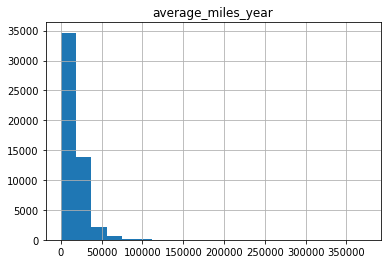

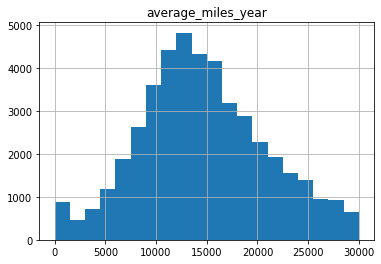

In [46]:
# plotting histogram of average_miles_year column
df.hist('average_miles_year', bins = 20)
# plotting histogram of average_miles_year column, but without outliers
df_without_outliers.hist('average_miles_year', bins = 20);

First histogram is not very well readable as because of the low distribution of high mileage values.
In the second histogram it is apparent there are no outliers.

## Ads lifetime

count    44744.000000
mean        39.581888
std         28.214631
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

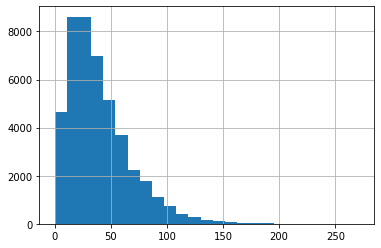

In [47]:
# plotting histogram of days_listed column
df_without_outliers['days_listed'].hist(bins=25)
df_without_outliers['days_listed'].describe()

Based on the histogram, it appears most typical values in days_listed are in range of 19 to 53 days and then there are ads which stay on the site for 100 and more days.

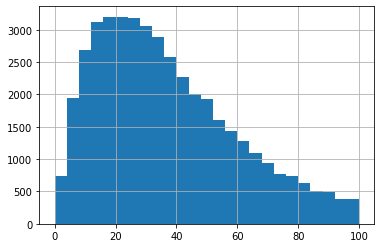

In [48]:
df_without_outliers['days_listed'].hist(bins=25, range=(0,100));

In [49]:
# categorizing days_listed based on quartiles
# 1st quartile: 0 - 19 (25% of values below normal - quickly sold)
# 2nd - 3rd: 19 - 53 (normal)
# 4th: 53 - max value (25% above normal - took long to sell)

bins = [0, 19, 53, 271]
names = ['quick', 'normal', 'long']

df['lifetime_category'] = pd.cut(df['days_listed'], bins, labels=names)

In [50]:
# adding same column - lifetime_category, to dataframe without outliers
bins = [0, 19, 53, 271]
names = ['quick', 'normal', 'long']

df_without_outliers['lifetime_category'] = pd.cut(df['days_listed'], bins, labels=names)

# counting values in each ads lifetime category
df_without_outliers.groupby(['lifetime_category'])['condition'].count()

lifetime_category
quick     11631
normal    21937
long      11129
Name: condition, dtype: int64

About half of ads fall into normal category - vehicles that get sold within 19 - 53 days. Vehicles that get sold quick are half the amount of normal. Same with the vehicles that stay on the site for long.

In [51]:
# grouping values by lifetime_category and counting values in each condition
days_condition = df_without_outliers.groupby(['lifetime_category', 'condition'])['price'].count()
days_condition

lifetime_category  condition
quick              excellent     5377
                   fair           409
                   good          4694
                   like new      1094
                   new             29
                   salvage         28
normal             excellent    10349
                   fair           726
                   good          8863
                   like new      1873
                   new             70
                   salvage         56
long               excellent     5209
                   fair           365
                   good          4510
                   like new       999
                   new             24
                   salvage         22
Name: price, dtype: int64

It appears 3 most common conditions listed on the site are - excellent, good and like new.

We can observe that vehicles that were sold quick and those that were listed for long, both have nearly same values within each condition category.


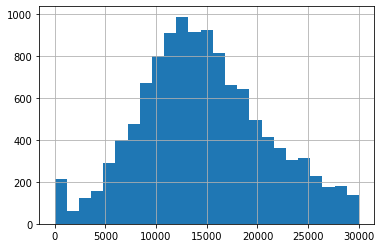

In [52]:
# plotting a histogram of average miles per year and vehicles that got sold quick
df_without_outliers.query('lifetime_category == "quick"')['average_miles_year'].hist(bins=25);

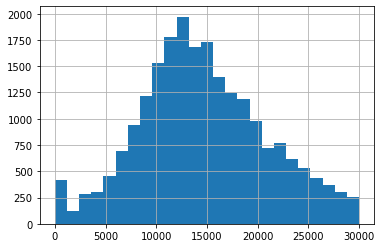

In [53]:
# plotting a histogram of average miles per year and vehicles that stayed on the site in the normal range of days (19 - 53)
df_without_outliers.query('lifetime_category == "normal"')['average_miles_year'].hist(bins=25);

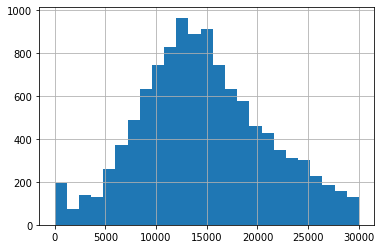

In [54]:
# plotting a histogram of average miles per year and vehicles that stayed on site for long
df_without_outliers.query('lifetime_category == "long"')['average_miles_year'].hist(bins=25);

Based on the histograms, it appears that mileages are very similar between ad categories. 

We can see vehicles that sell quick and long, both have most amount of ads listed with miles per year between 10000 - 15000, after that the amount of ads gets lower.

Same case appears to be with ads that fall into normal category - most ads have 10000 to 15000 miles per year and from there the mileage gets higher, but amount of ads, lower.

In [55]:
# counting vehicles that were sold quickly, grouping by car models
df_without_outliers.query('lifetime_category =="quick" ')['model'].value_counts().head(10)

ford f-150                    644
chevrolet silverado 1500      504
ram 1500                      397
chevrolet silverado           279
jeep wrangler                 268
honda accord                  247
chevrolet silverado 2500hd    224
toyota camry                  223
gmc sierra 1500               205
jeep grand cherokee           203
Name: model, dtype: int64

In [56]:
# counting ads that were listed for normal amount of days, grouping by car models
df_without_outliers.query('lifetime_category =="normal" ')['model'].value_counts().head(10)

ford f-150                  1160
chevrolet silverado 1500     924
ram 1500                     678
chevrolet silverado          536
jeep wrangler                495
toyota camry                 452
ram 2500                     451
honda accord                 427
toyota tacoma                403
ford explorer                375
Name: model, dtype: int64

In [57]:
# counting vehicles that took long to sell, grouping by car models
df_without_outliers.query('lifetime_category =="long" ')['model'].value_counts().head(10)

ford f-150                  571
chevrolet silverado 1500    457
ram 1500                    391
chevrolet silverado         302
ram 2500                    242
jeep wrangler               238
honda accord                232
gmc sierra 1500             229
toyota camry                210
jeep grand cherokee         193
Name: model, dtype: int64

About same exact vehicle models are most popular within all ad lifetime categories. The most commonly listed are Ford F-150, Chevrolet Silverado 1500 and RAM 1500. All of these models are distributed equally between ad lifetime categories - it seems vehicle model is not a significant factor in how long an ad will remain on the site.

In [58]:
# counting ads that were listed for 0 - 19 days by vehicle type
df_without_outliers.query('lifetime_category =="quick"')['type'].value_counts()

sedan          2783
SUV            2779
truck          2740
pickup         1594
coupe           493
wagon           376
mini-van        265
hatchback       244
van             136
convertible      98
other            61
offroad          57
bus               5
Name: type, dtype: int64

In [59]:
# counting ads that were listed for 19 - 53 days by vehicle type
df_without_outliers.query('lifetime_category =="normal"')['type'].value_counts()

SUV            5441
sedan          5213
truck          4938
pickup         3039
coupe           994
wagon           704
mini-van        513
hatchback       429
van             261
convertible     190
other           114
offroad          93
bus               8
Name: type, dtype: int64

In [60]:
# counting ads that were listed for 53 and above days by vehicle type
df_without_outliers.query('lifetime_category =="long"')['type'].value_counts()

SUV            2771
sedan          2637
truck          2619
pickup         1491
coupe           451
wagon           348
mini-van        243
hatchback       242
van             139
convertible      83
offroad          52
other            45
bus               8
Name: type, dtype: int64

It appears vehicle type does not influence how fast car sells as well. The amount of ads per vehicle type does not differ much.

## Average price per each type of vehicle

In [61]:
# looking at the number of ads and the average price for each type of vehicle
type_counts = df_without_outliers.pivot_table(index='type', values='price', aggfunc=['count', 'mean']).sort_values(by = ('count','price'), ascending=False)
type_counts

,count,mean
,price,price
type,,
SUV,10999,10754.259933
sedan,10643,6699.924645
truck,10311,16039.943749
pickup,6129,15236.353402
coupe,1940,14382.907216
wagon,1428,8890.336835
mini-van,1023,7617.312805
hatchback,917,6656.135224


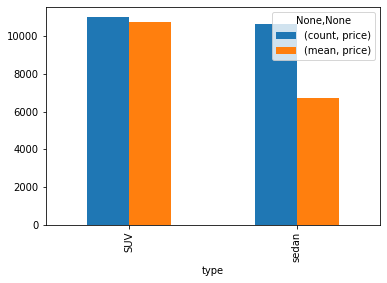

In [62]:
# plotting a bar graph of 2 most listed vehicle types
type_counts.head(2).plot(kind='bar');

Two types with the greatest number of ads are SUV and sedan.

## Price factors

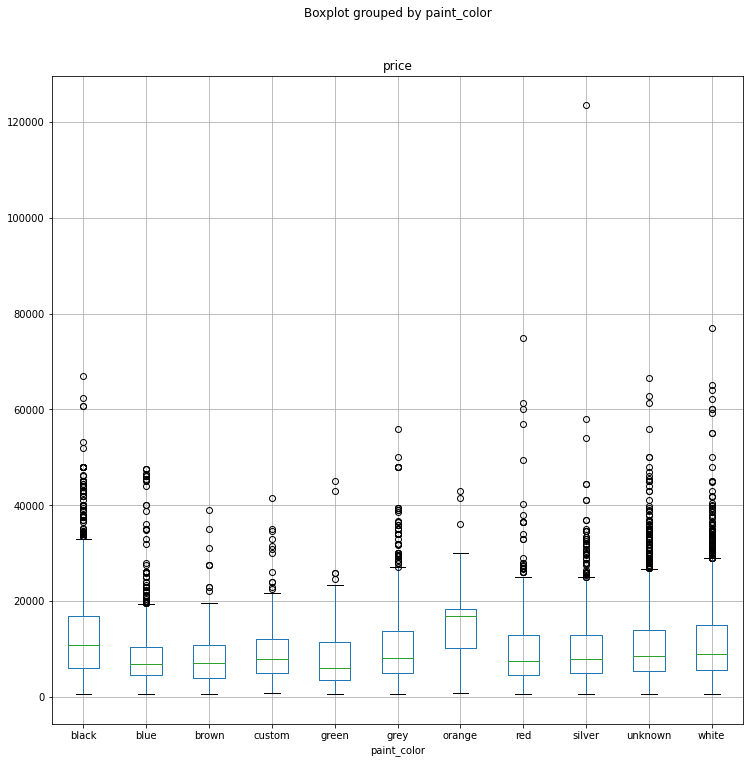

In [63]:
# grouping data by paint color and SUVs, excluding SUV colors that have less than 50 ads
SUV = df_without_outliers.query('type == "SUV"')
SUV_count_by_color = SUV.pivot_table(index='paint_color', values='price', aggfunc='count')
SUV_count_by_color_above_50 = SUV_count_by_color.query('price >= 50')
SUV_colors_above_50 = SUV_count_by_color_above_50.index
SUV_rows_with_colors_above_50 = SUV.query('paint_color in @SUV_colors_above_50')
SUV_rows_with_colors_above_50.boxplot(column='price', by='paint_color', figsize = (12, 12));

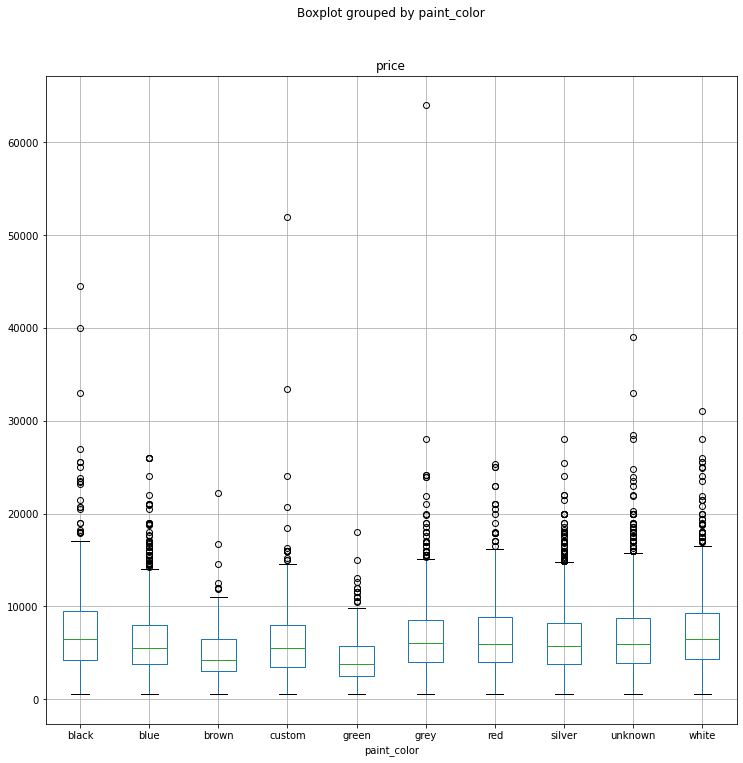

In [64]:
# grouping data by paint color and sedans, excluding sedan colors that have less than 50 ads
sedan = df_without_outliers.query('type == "sedan"')
sedan_count_by_color = sedan.pivot_table(index='paint_color', values='price', aggfunc='count')
sedan_count_by_color_above_50 = sedan_count_by_color.query('price >= 50')
sedan_colors_above_50 = sedan_count_by_color_above_50.index
sedan_rows_with_colors_above_50 = sedan.query('paint_color in @sedan_colors_above_50')
sedan_rows_with_colors_above_50.boxplot(column='price', by='paint_color', figsize = (12, 12));

-0.5942537644748962

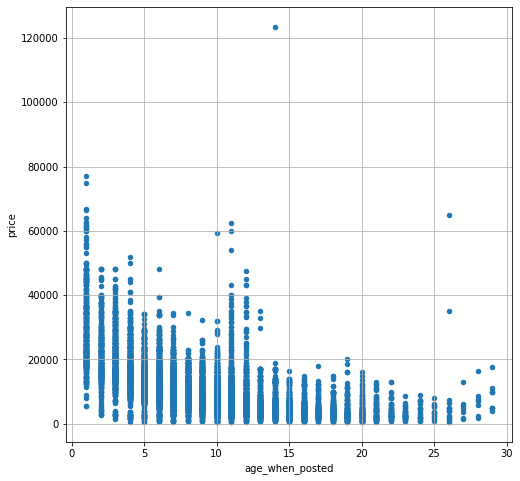

In [65]:
# slicing data by SUV
SUV_price_age = df_without_outliers.query('type == "SUV"')
# plotting a scatterplot
SUV_price_age.plot(x='age_when_posted', y='price', kind='scatter', grid=True, figsize=(8,8))
# checking the correlation between the two sets of data - SUV age and price
SUV_price_age['age_when_posted'].corr(SUV_price_age['price'])

There is a slight negative linear relationship between SUV's age and price - with increase in age, there is a decrease in price.

-0.6383522430621142

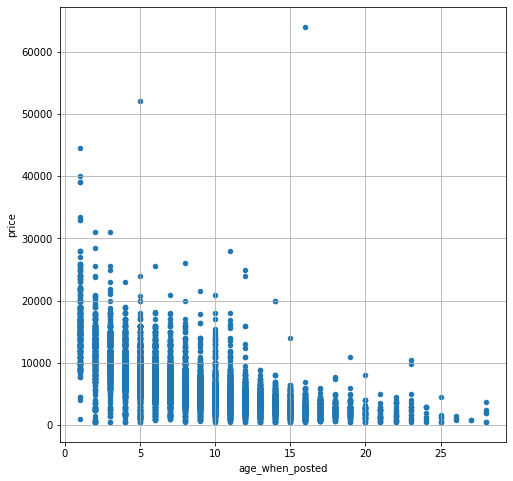

In [66]:
# slicing data by sedan
sedan_price_age = df_without_outliers.query('type == "sedan"')
# plotting a scatterplot
sedan_price_age.plot(x='age_when_posted', y='price', kind='scatter', grid=True, figsize=(8,8))
# checking the correlation between the two sets of data - sedan age and price
sedan_price_age['age_when_posted'].corr(sedan_price_age['price'])

There is a slight negative linear relationship between sedan's age and price - with increase in age, there is a decrease in price.

0.153481713884132

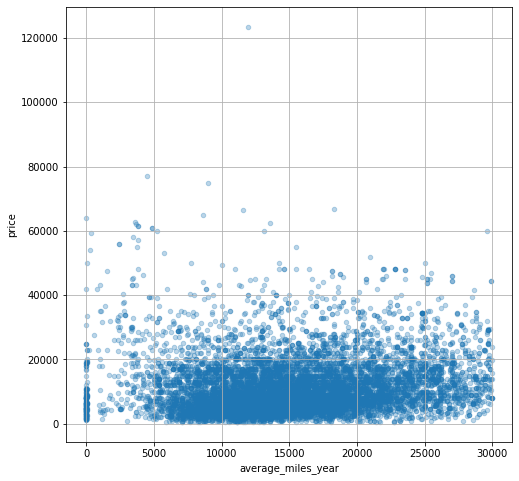

In [67]:
# slicing data by SUV
SUV_miles_price = df_without_outliers.query('type == "SUV"')
# plotting a scatterplot
SUV_miles_price.plot(x='average_miles_year', y='price', kind='scatter', grid=True, figsize=(8,8), alpha=0.3)
# checking the correlation
SUV_miles_price['average_miles_year'].corr(SUV_miles_price['price'])

There's a weak correlation between SUV's yearly mileage and price. It appears most ads fall between 10000 to 20000 miles per year, priced until 20000.

0.11454456845528574

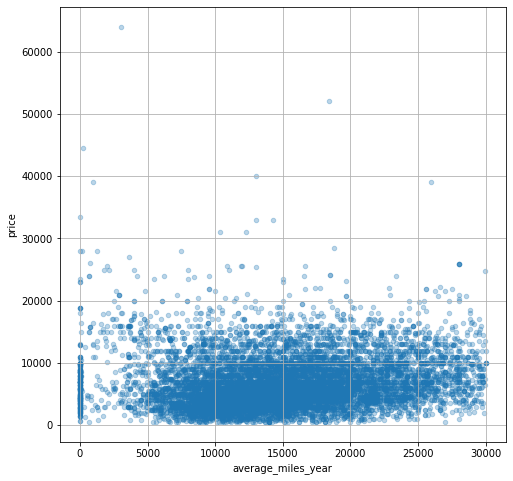

In [68]:
# slicing data by sedan
sedan_miles_price = df_without_outliers.query('type == "sedan"')
# plotting a scatterplot
sedan_miles_price.plot(x='average_miles_year', y='price', kind='scatter', grid=True, figsize=(8,8), alpha=0.3)
# checking the correlation
sedan_miles_price['average_miles_year'].corr(sedan_miles_price['price'])

Same with sedan - there's a weak correlation between sedan's yearly mileage and price. And also for sedan most ads fall between 10000 to 20000 miles per year, but priced until 10000.

                 price
condition_group       
0                 1400
1                 2250
2                 6697
3                 9950
4                13000
5                17995


0.2950988573855335

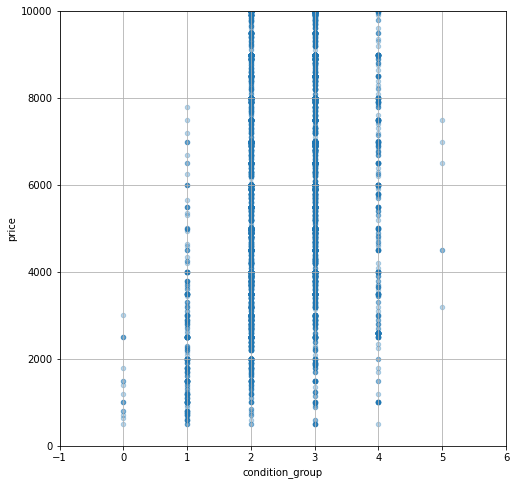

In [69]:
# slicing data by SUV
condition_price_SUV = df_without_outliers.query('type == "SUV"')
# looking at median prices for each condition group
condition_price_SUV_median = condition_price_SUV.pivot_table(index='condition_group', values='price', aggfunc='median')
print(condition_price_SUV_median)
# plotting a scatterplot
condition_price_SUV.plot(x='condition_group', y='price', kind='scatter', grid=True, figsize=(8,8), xlim=(-1,6), ylim=(0,10000), alpha=0.3)
# checking the correlation
condition_price_SUV['condition_group'].corr(condition_price_SUV['price'])

It appears SUVs that are listed as new start at the highest rate and have highest median price. Vehicles listed as salvage or fair have lowest median price. Good and excellent vehicles are most listed. The correlation of condition and price is rather weak.

                  price
condition_group        
0                2900.0
1                1500.0
2                4950.0
3                6600.0
4                7499.5
5                8995.0


0.3263042498963308

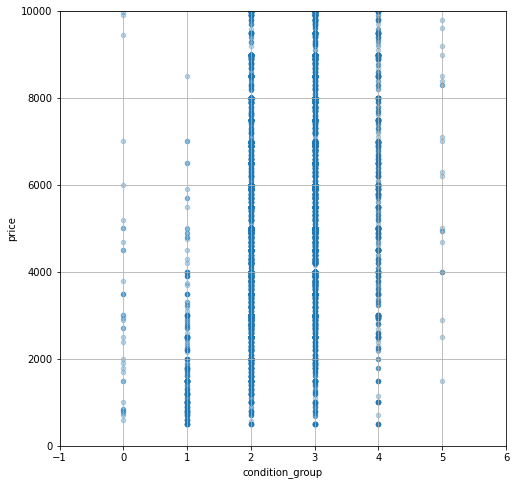

In [70]:
# slicing data by sedan
condition_price_sedan = df_without_outliers.query('type == "sedan"')
# looking at median prices for each condition group
condition_price_sedan_median = condition_price_sedan.pivot_table(index='condition_group', values='price', aggfunc='median')
print(condition_price_sedan_median)
# plotting a scatterplot
condition_price_sedan.plot(x='condition_group', y='price', kind='scatter', grid=True, figsize=(8,8), xlim=(-1,6), ylim=(0,10000), alpha=0.3)
# checking the correlation
condition_price_sedan['condition_group'].corr(condition_price_sedan['price'])

It appears sedans that are listed as new start at the highest rate and have highest median price. Vehicles listed as salvage or fair have lowest median price. Good and excellent vehicles are most listed. The correlation of condition and price is rather weak.

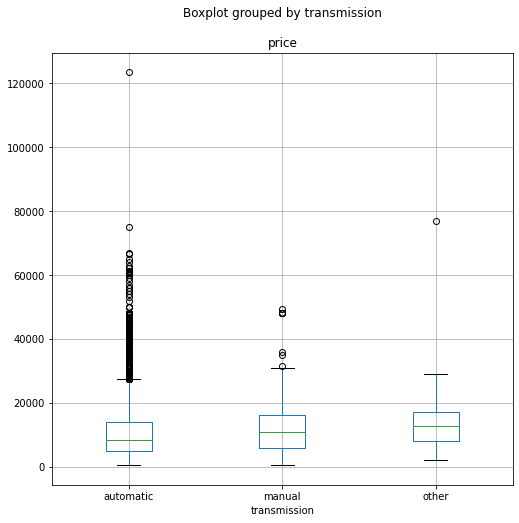

In [71]:
# slicing data by SUV
SUV_transmission = df_without_outliers.query('type == "SUV"')
SUV_transmission.pivot_table(index='transmission', values='price', aggfunc='count')
# creating a boxplot that shows each transmission type and price range
SUV_transmission.boxplot(column='price', by='transmission', figsize = (8, 8));

Most popular transmission type among SUV is automatic.
The median price for automatic SUVs appear lower than manual, but there are way more automatic SUVs listed than manual or other transmission types.

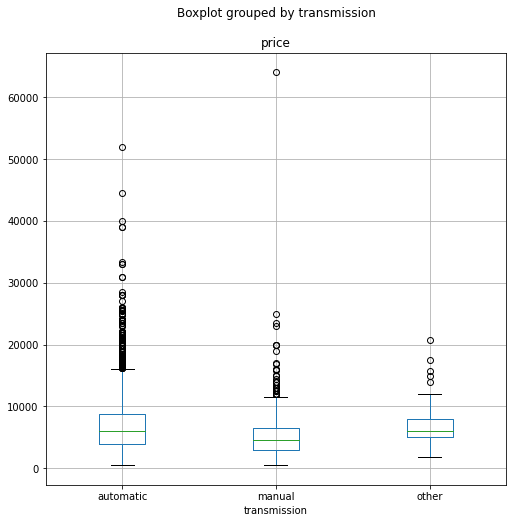

In [72]:
# slicing data by sedan
sedan_transmission = df_without_outliers.query('type == "sedan"')
sedan_transmission.pivot_table(index='transmission', values='price', aggfunc='count')
# creating a boxplot that shows each transmission type and price range
sedan_transmission.boxplot(column='price', by='transmission', figsize = (8, 8));

Also when it comes to sedan, most popular transmission type is automatic, but the median price for automatic sedans is higher than manual, even though there are way more automatic sedans listed than manual or other transmission types.

## Missing values

Originally, dataset included some problematic data that had to be addressed in order to make analysis possible.
Missing values in model_year, cylinders and odometer have been replaced according to model and model year, missing values in paint_color have been replaced with 'unknown', missing values in is_4wd have been replaced with 0 (- not a 4 wheel drive).

There are new columns that have been added to the dataset as well: model_year_filled, weekday, month_posted, year_posted, age_when_posted, average_miles_year, condition_group.

model_year_filled column has values from model_year where missing values were replaced by grouping the data by model and calculating mean model year for each model.

weekday - day of the week.

month_posted - month of when the ad was placed.

year_posted - year when the ad was placed.

age_when_posted - vehicle's age (in years) when the ad was placed.

average_miles_year - vehicle's average mileage per year.

condition_group - new = 5, like new = 4, excellent = 3, good = 2, fair = 1, salvage = 0

lifetime_category - quick (ads that get sold between 0 - 19 days), normal (19 - 53 days), long (53 and above).

## Outliers
To not distort the analysis, outliers or unusual values were removed and not taken into account.

A separate dataframe without outliers was created. This dataframe excludes rows where average miles per year are above 30 000 (high mileage), rows where mileage is 0 and vehicle is above 10 years old (0 miles might be due to invalid input / tampered reading / odometer rolling back to 0 for certain older models, rows where price is below 500 (prices 0 - 500 are rather outliers and part might be due to invalid input) and rows that contain cars older than 30 years as those would be considered retro vehicles. Buying and selling of retro vehicles should be studied separately.

## General conclusion
Fast lifetime of an ad is between 0 to 19 days, normal - 19 - 53 days and long - anything above 53.

About half of ads fall into normal category - vehicles that get sold within 19 - 53 days. Vehicles that get sold quick are half the amount of normal. Same with the vehicles that stay on the site for long.

Based on performed analysis, 3 most common conditions listed on the site are - excellent, good and like new. Condition of a vehicle does not greatly influence how long an ad remains on the site as it was observed that vehicles that were sold quick and those that were listed for long, both have nearly same values within each condition category.

It appears that mileages are very similar between ad categories.

Vehicles that sell quick and long, both have most amount of ads listed with miles per year between 10000 - 15000, after that the amount of ads gets lower.

Same case appears to be with ads that fall into normal category - most ads have 10000 to 15000 miles per year and from there the mileage gets higher, but amount of ads, lower.

About same exact vehicle models are most popular within all ad lifetime categories. The most commonly listed are Ford F-150, Chevrolet Silverado 1500 and RAM 1500. All of these models are distributed equally between ad lifetime categories - it seems vehicle model is not a significant factor in how long an ad will remain on the site.

It appears vehicle type alone does not influence how fast car sells as well. The amount of ads per vehicle type in each ad lifetime category does not differ much.

Two vehicle types with the greatest number of ads are SUV and sedan.

Looking at SUV price and age, we can observe a slight negative linear relationship (Pearson correlation coefficient -0.59) - with increase in age, there is a decrease in price. Similarily, sedan price and age has a slight negative correlation (-0.63).

There's a weak correlation between SUV's yearly mileage and price. It appears most ads fall between 10000 to 20000 miles per year, priced until 20000.

Same with sedan - there's a weak correlation between sedan's yearly mileage and price. And also for sedan most ads fall between 10000 to 20000 miles per year, but priced until 10000.

SUVs that are listed as new start at the highest rate and have highest median price. Vehicles listed as salvage or fair have lowest median price. Good and excellent vehicles are most listed. The correlation of condition and price is rather weak.

Same with sedan - sedans that are listed as new start at the highest rate and have highest median price. Vehicles listed as salvage or fair have lowest median price. Good and excellent vehicles are most listed. The correlation of condition and price is rather weak.

Most popular transmission type among SUV is automatic.
The median price for automatic SUVs appear lower than manual, but there are way more automatic SUVs listed than manual or other transmission types.

Also when it comes to sedan, most popular transmission type is automatic, but the median price for automatic sedans is higher than manual, even though there are way more automatic sedans listed than manual or other transmission types.